In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib

In [2]:
state_abbrevs = requests.get('https://alphabetizer.flap.tv/lists/list-of-us-state-abbreviations.php')
soup = BeautifulSoup(state_abbrevs.content, 'html.parser')

In [3]:
states = ["DC"]
abbrevs = soup.find_all("li")
for abbv in abbrevs:
    states.append(abbv.text)
print(states)

['DC', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [4]:
urls = []
state_centers = {}
container = []
errors = []
for state in states:
    url = "https://www.plannedparenthood.org/health-center/" + state
    urls.append(url)
    state_page = requests.get(url)
    state_soup = BeautifulSoup(state_page.content, 'html.parser')
    bucket = state_soup.find("ul", "quicklist-list")
    tags = bucket.find_all("li")
    it = 0
    for n, tag in enumerate(tags):
        it += 1
        try:
            link = tag.find("a")
            title = link.text
    #         print(title)
            location = tag.find("span","address-region").text
            container.append([title, location])
        except:
            errors.append([url, tag, n])
            continue
        print(location)

Anchorage, AK
Fairbanks, AK
Juneau, AK
Soldotna, AK
Birmingham, AL
Mobile, AL
Fayetteville, AR
Little Rock, AR
Flagstaff, AZ
Glendale, AZ
Mesa, AZ
Phoenix, AZ
Phoenix, AZ
Tempe, AZ
Tucson, AZ
Alhambra, CA
Anaheim, CA
Antioch, CA
Bakersfield, CA
Burbank, CA
Canoga Park, CA
Chico, CA
Chula Vista, CA
Clearlake, CA
Coachella, CA
Concord, CA
Costa Mesa, CA
El Cajon, CA
El Centro, CA
El Cerrito, CA
El Monte, CA
Escondido, CA
Eureka, CA
Fairfield, CA
Fresno, CA
Fresno, CA
Gilroy, CA
Glendora, CA
Hayward, CA
Lakewood, CA
Lakewood, CA
Lawndale, CA
Long Beach, CA
Los Angeles, CA
Los Angeles, CA
Los Angeles, CA
Los Angeles, CA
Los Angeles, CA
Los Angeles, CA
Los Angeles, CA
Madera, CA
Manteca, CA
Merced, CA
Mission Viejo, CA
Modesto, CA
Moreno Valley, CA
Mountain View, CA
Napa, CA
North Highlands, CA
Oakland, CA
Oakland, CA
Orange, CA
Palmdale, CA
Pasadena, CA
Pomona, CA
Rancho Mirage, CA
Rancho Mirage, CA
Redding, CA
Redwood City, CA
Richmond, CA
Riverside, CA
Roseville, CA
Sacramento, CA
Sacram

Vienna, WV


In [5]:
container

[['Anchorage Health Center', 'Anchorage, AK'],
 ['Fairbanks Health Center', 'Fairbanks, AK'],
 ['Juneau Health Center', 'Juneau, AK'],
 ['Soldotna Health Center', 'Soldotna, AK'],
 ['Birmingham Center', 'Birmingham, AL'],
 ['Mobile Center', 'Mobile, AL'],
 ['Fayetteville Health Center', 'Fayetteville, AR'],
 ['Little Rock Health Center', 'Little Rock, AR'],
 ['Flagstaff Health Center', 'Flagstaff, AZ'],
 ['Glendale Health Center', 'Glendale, AZ'],
 ['Mesa Health Center', 'Mesa, AZ'],
 ['Central Phoenix Health Center', 'Phoenix, AZ'],
 ['Maryvale Health Center', 'Phoenix, AZ'],
 ['Tempe Regional Health Center', 'Tempe, AZ'],
 ['Southern Arizona Regional Health Center', 'Tucson, AZ'],
 ['Alhambra Health Center', 'Alhambra, CA'],
 ['Anaheim Health Center', 'Anaheim, CA'],
 ['Antioch Health Center', 'Antioch, CA'],
 ['Bakersfield Health Center', 'Bakersfield, CA'],
 ['Burbank Health Center', 'Burbank, CA'],
 ['Canoga Park Health Center', 'Canoga Park, CA'],
 ['Chico Health Center', 'Chico,

In [6]:
df = pd.DataFrame(container)
df.columns = ['Center Name', 'Location']
df.head()

,Center Name,Location
0,Anchorage Health Center,"Anchorage, AK"
1,Fairbanks Health Center,"Fairbanks, AK"
2,Juneau Health Center,"Juneau, AK"
3,Soldotna Health Center,"Soldotna, AK"
4,Birmingham Center,"Birmingham, AL"


In [7]:
df['State'] = df.Location.map(lambda x: x[-2:])
df.head()

,Center Name,Location,State
0,Anchorage Health Center,"Anchorage, AK",AK
1,Fairbanks Health Center,"Fairbanks, AK",AK
2,Juneau Health Center,"Juneau, AK",AK
3,Soldotna Health Center,"Soldotna, AK",AK
4,Birmingham Center,"Birmingham, AL",AL


In [8]:
state_counts = df.groupby('State').count()
state_counts["Location"].astype(int)
# .sort_values(by='Location', ascending=False).head(10)
state_counts

,Center Name,Location
State,,
AK,4,4
AL,2,2
AR,2,2
AZ,7,7
CA,107,107
CO,19,19
CT,16,16
DE,3,3
FL,22,22


In [9]:
df.Location.iloc[0].strip()[-2:]

'AK'

Text(0.5,0,'# PP Centers')

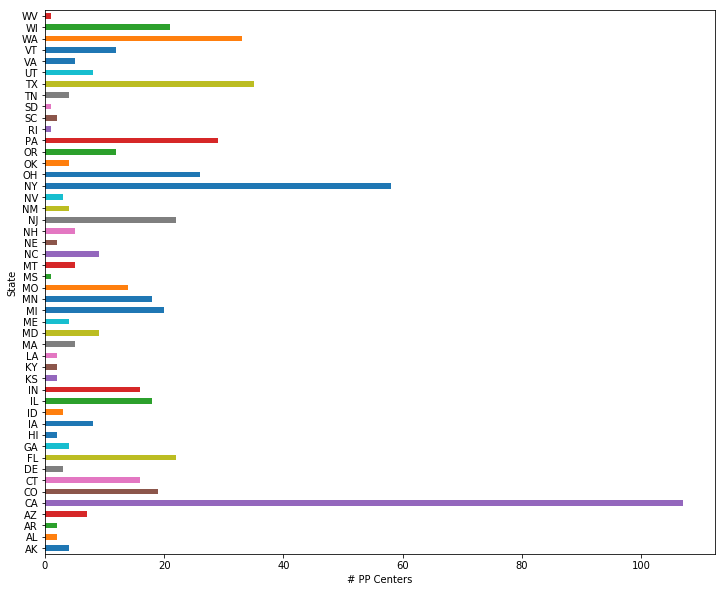

In [13]:
chart2 = state_counts['Location'].plot(kind='barh', figsize=(12,10))
chart2.set_xlabel("# PP Centers")

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
majordepressive = pd.read_csv('majordepressive.csv')

Text(0.5,0,'% of women with major depressive episode')

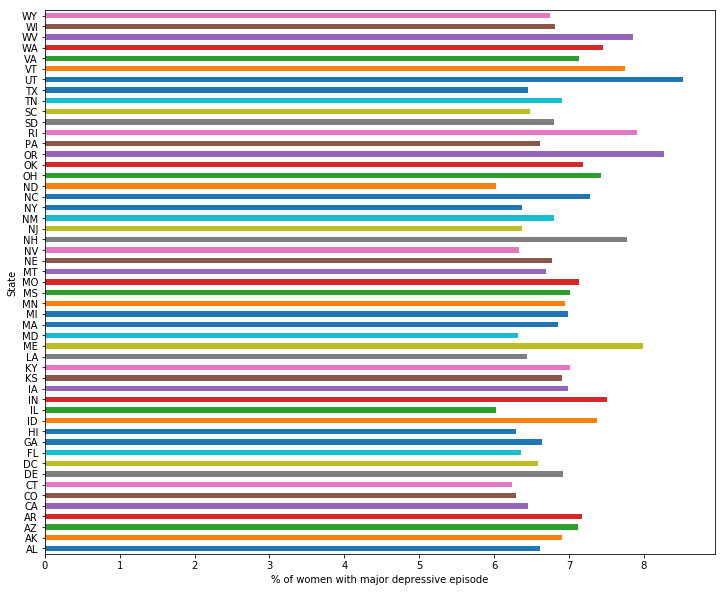

In [18]:
chart1 = majordepressive.set_index('State')['Mean'].plot(kind='barh', figsize=(12,10))
chart1.set_xlabel("% of women with major depressive episode")

In [19]:
statepops = pd.read_csv('statepops.csv')

In [20]:
both_charted = pd.merge(state_counts, majordepressive, on='State', how='outer')

In [21]:
# both_charted.columns = ["State", "PP Centers", "Mean Depressive %"]

In [23]:
# both_charted = both_charted.drop([48,49,50]) - why does this say not on axis?
both_charted

,State,Center Name,Location,Mean
0,AK,4.0,4.0,6.91
1,AL,2.0,2.0,6.61
2,AR,2.0,2.0,7.17
3,AZ,7.0,7.0,7.12
4,CA,107.0,107.0,6.46
5,CO,19.0,19.0,6.30
6,CT,16.0,16.0,6.24
7,DE,3.0,3.0,6.92
8,FL,22.0,22.0,6.36
9,GA,4.0,4.0,6.64


In [24]:
both_with_pop = pd.merge(both_charted, statepops, on='State', how='outer')
both_with_pop

,State,Center Name,Location,Mean,Population,category
0,AK,4.0,4.0,6.91,"741,522",state
1,AL,2.0,2.0,6.61,"4,860,545",state
2,AR,2.0,2.0,7.17,"2,988,231",state
3,AZ,7.0,7.0,7.12,"6,908,642",state
4,CA,107.0,107.0,6.46,"39,296,476",state
5,CO,19.0,19.0,6.30,"5,530,105",state
6,CT,16.0,16.0,6.24,"3,587,685",state
7,DE,3.0,3.0,6.92,"952,698",state
8,FL,22.0,22.0,6.36,"20,656,589",state
9,GA,4.0,4.0,6.64,"10,313,620",state


In [30]:
both_with_pop['Population'] = both_with_pop['Population'].str.replace(',', '')
both_with_pop["PerCapita"] = both_with_pop['Location'].astype(float)/both_with_pop['Population'].astype(float)
both_with_pop["PerCapita"] = both_with_pop["PerCapita"]*100000
both_with_pop

,State,Center Name,Location,Mean,Population,category,PerCapita
0,AK,4.0,4.0,6.91,741522,state,0.539431
1,AL,2.0,2.0,6.61,4860545,state,0.041148
2,AR,2.0,2.0,7.17,2988231,state,0.066929
3,AZ,7.0,7.0,7.12,6908642,state,0.101322
4,CA,107.0,107.0,6.46,39296476,state,0.272289
5,CO,19.0,19.0,6.30,5530105,state,0.343574
6,CT,16.0,16.0,6.24,3587685,state,0.445970
7,DE,3.0,3.0,6.92,952698,state,0.314895
8,FL,22.0,22.0,6.36,20656589,state,0.106504
9,GA,4.0,4.0,6.64,10313620,state,0.038784


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f239f98>,
      dtype=object)

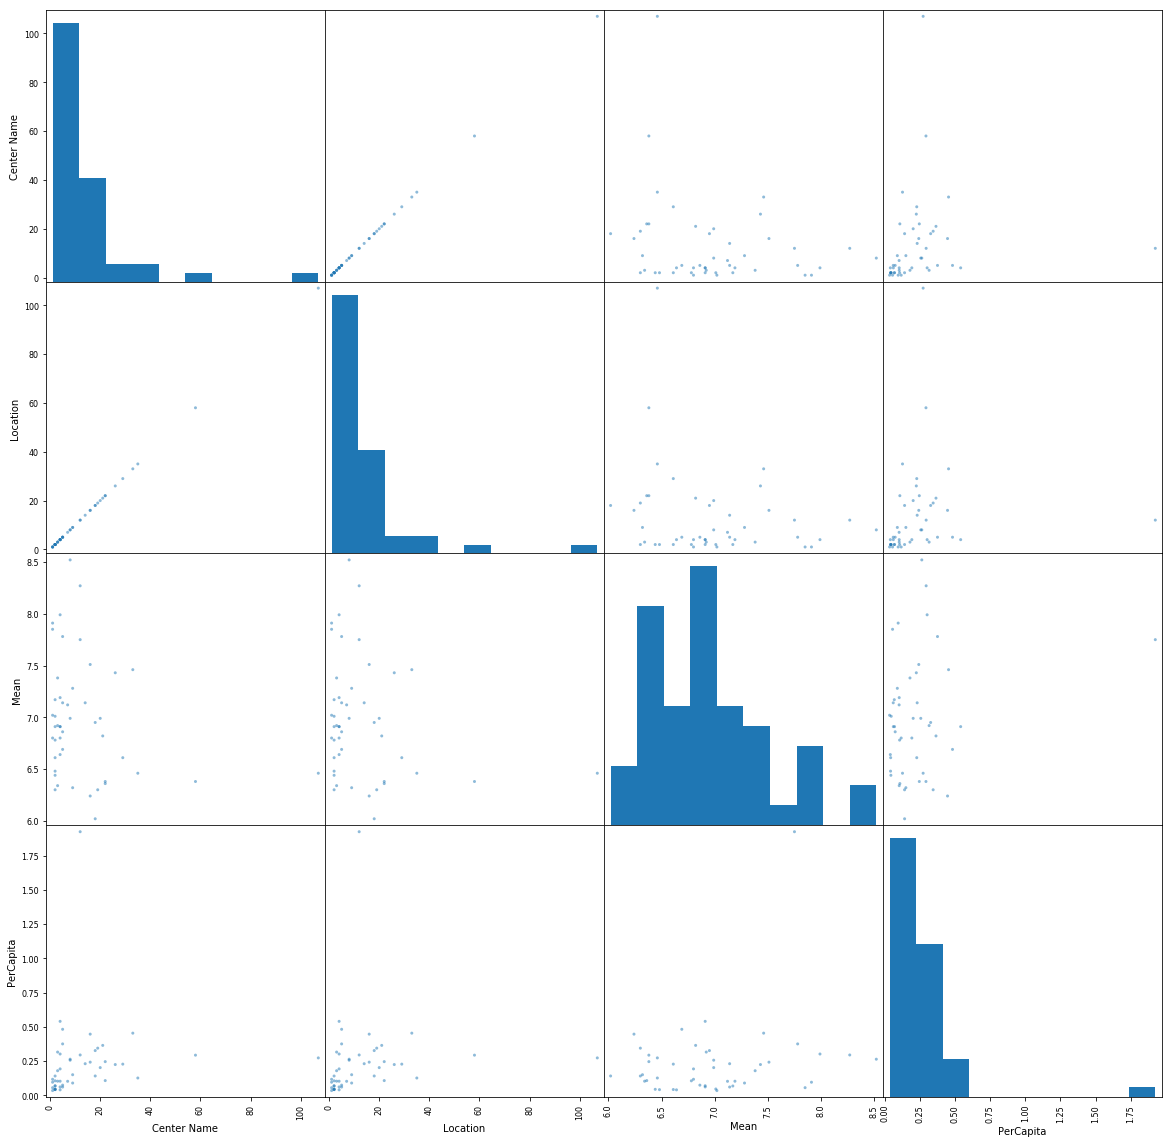

In [31]:
pd.plotting.scatter_matrix(both_with_pop, figsize=(20,20))

In [140]:
both_with_pop

,Mean,Percapita


In [32]:
import plotly
plotly.tools.set_credentials_file(username='m357', api_key='Bc3XpGbBZfEalqoUjYPl')
import plotly.plotly as py
import pandas as pd

df =  both_with_pop

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['State'],
        z = df['Location'].astype(float),
        locationmode = 'USA-states',
        text = df['Location'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "PP Centers Per State")
        ) ]

layout = dict(
        title = '2018 PP Centers Per State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~m357/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [34]:
df2 =  both_with_pop

for col in df.columns:
    df2[col] = df2[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# df['text'] = df['state'] + '<br>' +\
#     'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#     'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#     'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['State'],
        z = df2['PerCapita'].astype(float),
        locationmode = 'USA-states',
        text = df2['PerCapita'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "PP Per Capita (per 100,000)")
        ) ]

layout = dict(
        title = '2018 PP Centers Per Capita<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~m357/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [36]:

import plotly.plotly as py
import pandas as pd

df =  both_with_pop

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['State'],
        z = df['Mean'].astype(float),
        locationmode = 'USA-states',
        text = df['Mean'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Prevalence of Depressive Episodes(%)")
        ) ]

layout = dict(
        title = 'Prevalence of Depressive Episodes<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~m357/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [164]:
# both_with_pop
# both_with_pop.drop([48,49,50])
# both_charted[["Location","Mean"]] = df[["Location","Mean"]].apply(pd.to_numeric)
# both_with_pop.plot.hist(stacked=True, bins=50)
# both_with_pop

In [165]:
# import numpy as np
# both_charted = pd.DataFrame(columns=['Mean', 'Location']).head()
# both_charted.plot.bar(figsize=(20,20));

In [214]:
# plt.plot.scatter_matrix(both_with_pop[["PerCapita","Mean"]], figsize=(20,20))

In [38]:
both_with_pop.plot.bar()

TypeError: Empty 'DataFrame': no numeric data to plot